In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
# import pickle
import pylab as plt

from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir



# Setup

In [2]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = 1# Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*8,
          'text.fontsize': Ampl*8,
          'legend.fontsize': Ampl*8,
          'xtick.labelsize': Ampl*8,
          'ytick.labelsize': Ampl*8,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out'
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Plot

In [5]:
path_read = '../data_filter/'
fname_data = 'ipip300-no0_arr_pd_neoac_score-1.npy'
filename= os.path.join(path_read,fname_data)
label = fname_data.split('.')

list_doms = ['N','E','O','A','C']
list_doms_labels = list_doms

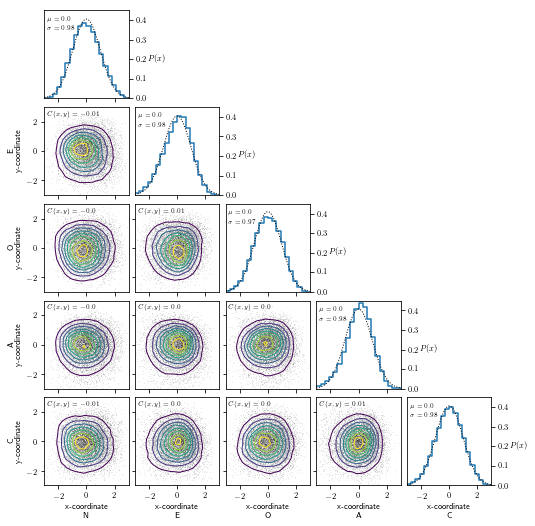

In [7]:
## load data   
arr_pd_z = np.load(filename)
P,D = np.shape(arr_pd_z)

#     ## z-scoring the scores
#     for i in range(D):
#         arr_pd_tmp = arr_pd_z[:,i]
#         arr_pd_z[:,i] = (arr_pd_tmp - np.mean(arr_pd_tmp))/np.std(arr_pd_tmp)






### plot

arr_pd_z_s = arr_pd_z[:10000]
xylim=3
nbins = 21
nbins2 = 20

n=D
f = plt.figure(figsize=fig_size)
plt.clf()
xmin = -xylim
xmax = xylim
arr_bins = np.linspace(xmin,xmax,nbins)
N = len(arr_pd_z)
for i_dom1,dom1 in enumerate(list_doms):
    for i_dom2,dom2 in enumerate(list_doms):

        if i_dom1>i_dom2:
            ax=f.add_subplot(n,n, i_dom1*n+i_dom2+1  )

            arr_x = arr_pd_z_s[:,i_dom2]
            arr_y = arr_pd_z_s[:,i_dom1]
            arr_x_full = arr_pd_z[:,i_dom2]
            arr_y_full = arr_pd_z[:,i_dom1]
            ax.scatter(arr_x,arr_y,lw=0,marker='o',color='black',alpha=0.1,s=1)


            cov = np.corrcoef(arr_x_full,arr_y_full)[0,1]
            ax.text(-2.8,2.4,r'$C(x,y) = %s$'%((round(cov,2))),size=6*Ampl)
            ax.set_ylim(-xylim,xylim)
            ax.set_xlim(-xylim,xylim)
            if i_dom2>0:
                ax.set_yticklabels([])
            else:
                ax.set_ylabel('%s \n y-coordinate'%(list_doms_labels[i_dom1]))


            xi = np.linspace(-xylim, xylim, nbins2)
            yi = np.linspace(-xylim, xylim, nbins2)
            X, Y = np.meshgrid(xi[:-1], yi[:-1])
#             X, Y = np.meshgrid(xlist, ylist)
            Z = np.histogram2d(arr_y_full,arr_x_full,bins=[xi,yi])[0]
            cp = ax.contour(X, Y, Z, 8, linewidths=1,origin='lower',antialised=True,alpha=1)#, colors='k')

        if i_dom1==i_dom2:
            ax=f.add_subplot(n,n, i_dom1*n+i_dom2+1  )
            arr_x = arr_pd_z[:,i_dom1]

            mu = np.mean(arr_x)
            std = np.std(arr_x)
            ## empircial
            H,bin_edges = np.histogram(arr_x,bins=arr_bins,normed=True)
            p_H = H#/float(N)/(arr_bins[1]-arr_bins[0])
            p_H = np.append(p_H,0.0)           
            ax.step(arr_bins,p_H,where='post')
            ax.text(-2.8,0.4,r'$\mu = %s$'%(round(np.abs(mu),2)),size=6*Ampl)
            ax.text(-2.8,0.35,r'$\sigma = %s$'%(round(std,2)),size=6*Ampl)



            ## Gaussian distribution
            X = np.linspace(-3,3,101)
            Y = 1.0/np.sqrt(2.0*np.pi*std**2)*np.exp(-0.5*((X-mu)/std)**2)
            ax.plot(X,Y,ls=':',lw=1,color=(str(0.0)))

            ax.set_ylim(0,0.45)
            ax.set_xlim(-xylim,xylim)
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(r'$P(x)$',rotation=0,labelpad=10)


        if i_dom1!=n-1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('x-coordinate \n %s'%(list_doms_labels[i_dom2]))



plt.subplots_adjust(left=0.1,bottom=0.1,top=0.95,right=0.9,hspace=0.1,wspace=0.075)